In [3]:
import pandas as pd

iris = pd.read_csv("iris.csv", header=None)
print(iris)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
iris = iris.dropna()
iris = iris.drop_duplicates()
print(iris)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[147 rows x 5 columns]


In [5]:
from sklearn import model_selection
X = iris.iloc[:, 0:4].values.reshape(-1, 4)
Y = iris.iloc[:, 4:5].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X ,Y, test_size=0.2, shuffle=True)

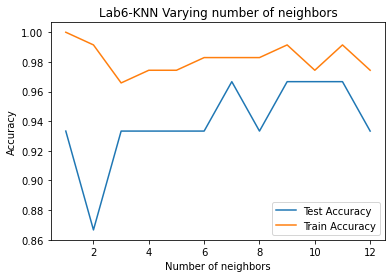

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
Y_train = Y_train.ravel()
train_acc = [0.0] * 12
test_acc = [0.0] * 12
neighbors = []
for i in range(12):
    neighbors.append(i+1)
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train, Y_train)
    train_acc[i] = knn.score(X_train, Y_train)
    test_acc[i] = knn.score(X_test, Y_test)
plt.title("Lab6-KNN Varying number of neighbors")
plt.plot(neighbors, test_acc, label='Test Accuracy')
plt.plot(neighbors, train_acc, label='Train Accuracy')
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

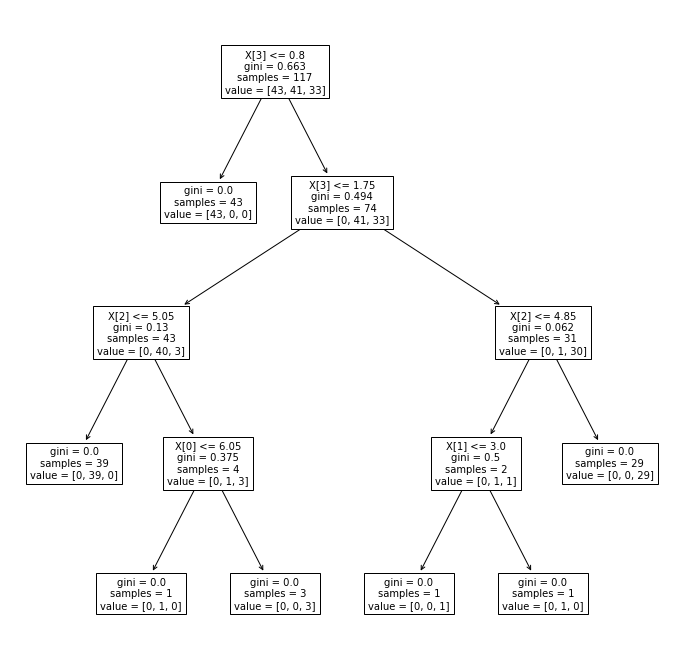

In [8]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

from sklearn import tree
from IPython.display import Image
import pydotplus
feature_name = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class_name = ['setosa', 'versicolor', 'virginica' ]
### use the function export_graphviz() to export the tree to Graphviz format ###
dot_data = tree.export_graphviz(clf, filled=True, rounded=True,
feature_names=feature_name, class_names=class_name, special_characters=True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
              

plt.figure(figsize=(12,12)) # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()